In [ ]:
%pip install opendatasets
%pip install seaborn
%pip install seaborn matplotlib


In [3]:
import opendatasets as od
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix,accuracy_score


In [ ]:
od.download("https://www.kaggle.com/datasets/shashwatwork/web-page-phishing-detection-dataset")

In [2]:
dataset = 'web-page-phishing-detection-dataset/dataset_phishing.csv'

In [4]:
df = pd.read_csv (dataset)   #df = dataframe
print(df.shape) 
df

(11430, 89)


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [ ]:
df.isnull()

In [ ]:
df.info()                    

In [7]:
#import pandas as pd
import matplotlib.pyplot as plt

# Conta o número de linhas duplicadas no
num_duplicados = df.duplicated().sum()

# Calcula o número total de linhas no DataFrame
num_total_linhas = df.shape[0]

# Calcular o número de linhas únicas (excluindo duplicatas)
num_linhas_unicas = num_total_linhas - num_duplicados

print (num_linhas_unicas)
print(num_duplicados)


11430
0


In [13]:
df['status'].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

In [14]:
# Converter os rótulos 'legitimate' para 0 e 'phishing' para 1
mapping = {'legitimate':0, 'phishing':1}
df['status'] = df['status'].map(mapping)


In [15]:
df['status'].value_counts()


status
0    5715
1    5715
Name: count, dtype: int64

In [16]:
# calcula a correlação apenas entre as colunas numéricas do DataFrame,
# ignorando colunas que  não contenham dados numéricos
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
length_url,1.000000,0.223025,0.453961,0.443589,0.399564,0.150739,0.520930,0.576268,NaN,0.621745,...,0.125159,-0.006476,-0.007082,0.002799,-0.006798,0.072205,0.023357,0.236395,-0.102582,0.248580
length_hostname,0.223025,1.000000,0.252013,0.408956,0.057702,0.071793,0.162400,0.145617,NaN,0.183405,...,0.217284,0.074707,-0.097794,-0.041081,0.013854,0.163238,-0.023344,0.213990,-0.159342,0.238322
ip,0.453961,0.252013,1.000000,0.288398,0.109860,0.059401,0.405434,0.383262,NaN,0.440972,...,0.137716,0.014561,0.053246,-0.108869,-0.077020,0.167930,0.127823,0.270743,-0.218968,0.321698
nb_dots,0.443589,0.408956,0.288398,1.000000,0.045099,0.263283,0.347411,0.435798,NaN,0.414902,...,0.107789,0.055560,0.056407,-0.024117,-0.007818,0.087969,0.126659,0.209616,-0.097312,0.207029
nb_hyphens,0.399564,0.057702,0.109860,0.045099,1.000000,0.018770,0.036804,0.120487,NaN,0.107050,...,0.006909,0.020297,-0.055794,0.038163,0.080104,-0.041464,-0.031477,-0.018828,0.104341,-0.100107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
web_traffic,0.072205,0.163238,0.167930,0.087969,-0.041464,-0.009459,0.143777,0.164797,NaN,0.187809,...,0.081786,0.083888,0.022598,-0.110435,-0.096698,1.000000,-0.007113,0.034099,-0.209526,0.060388
dns_record,0.023357,-0.023344,0.127823,0.126659,-0.031477,0.031611,0.009441,0.076372,NaN,0.052159,...,0.062084,0.043817,0.213899,-0.060811,-0.068023,-0.007113,1.000000,0.096413,-0.142135,0.122119
google_index,0.236395,0.213990,0.270743,0.209616,-0.018828,0.113217,0.201260,0.129093,NaN,0.167385,...,0.267465,-0.143655,0.040633,-0.134656,-0.210111,0.034099,0.096413,1.000000,-0.389887,0.731171
page_rank,-0.102582,-0.159342,-0.218968,-0.097312,0.104341,-0.066356,-0.123852,-0.126164,NaN,-0.133089,...,-0.330810,0.058843,-0.155990,0.345751,0.589602,-0.209526,-0.142135,-0.389887,1.000000,-0.511137


In [17]:
# calcula a correlação entre a coluna 'status'e as outras colunas numéricas do DataFrame
target_corr = corr_matrix['status']
target_corr

length_url         0.248580
length_hostname    0.238322
ip                 0.321698
nb_dots            0.207029
nb_hyphens        -0.100107
                     ...   
web_traffic        0.060388
dns_record         0.122119
google_index       0.731171
page_rank         -0.511137
status             1.000000
Name: status, Length: 88, dtype: float64

In [18]:
# filtra caracteristicas com base na correlção mínima com o atributo  'status' 

threshold=0.1
#escolhe apenas recursos com correlação com 'status' com valor de abs > 0,1 
relevant_features = target_corr[abs(target_corr)>threshold].index.tolist() 
#calcula a correlação de cada caracteristica com 'status' e filtra o valor com abs maior que 0.1
#obtem o indece dessa caracteristcas 
relevant_features


['length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_hyphens',
 'nb_at',
 'nb_qm',
 'nb_and',
 'nb_eq',
 'nb_slash',
 'nb_semicolumn',
 'nb_www',
 'nb_com',
 'https_token',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'abnormal_subdomain',
 'nb_subdomains',
 'prefix_suffix',
 'shortening_service',
 'length_words_raw',
 'shortest_word_host',
 'longest_words_raw',
 'longest_word_host',
 'longest_word_path',
 'avg_words_raw',
 'avg_word_host',
 'avg_word_path',
 'phish_hints',
 'suspecious_tld',
 'statistical_report',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'ratio_extRedirection',
 'external_favicon',
 'links_in_tags',
 'ratio_intMedia',
 'ratio_extMedia',
 'safe_anchor',
 'empty_title',
 'domain_in_title',
 'domain_with_copyright',
 'domain_registration_length',
 'domain_age',
 'dns_record',
 'google_index',
 'page_rank',
 'status']

In [19]:
X = df[relevant_features]
X = X.drop('status', axis=1) 
y = df['status']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
#modelo de desenvolvimento

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [22]:
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
#SVM (Support Vector Machine)

In [24]:
svm = SVC()
svm.fit(X_train_scaled,y_train)

SVC()

In [25]:
svm_predict = svm.predict(X_test_scaled)

In [26]:
accuracy = accuracy_score(y_test,svm_predict)
print("Accuracy:{}%".format(round(accuracy *100), 1))

Accuracy:97%


In [27]:
svm_Accuracy_Score = accuracy_score(y_test,svm_predict)
svm_JaccardIndex = jaccard_score(y_test,svm_predict)
svm_F1_Score = f1_score(y_test,svm_predict)
svm_Log_Loss = log_loss(y_test,svm_predict)

In [28]:
print(f"Accuracy: {svm_Accuracy_Score}")
print(f"Jaccard Index: {svm_JaccardIndex}")
print(f"F1 Score: {svm_F1_Score}")
print(f"Log Loss: {svm_Log_Loss}")

Accuracy: 0.9654418197725284
Jaccard Index: 0.9321888412017167
F1 Score: 0.9649044868947134
Log Loss: 1.245603069877627


In [29]:
svm_conf_matrix = confusion_matrix(y_test,svm_predict)
svm_conf_matrix

array([[1121,   36],
       [  43, 1086]], dtype=int64)

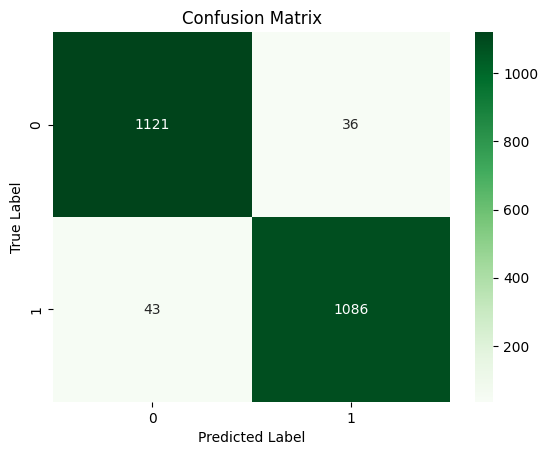

In [30]:
sns.heatmap(svm_conf_matrix,annot=True, fmt = 'd',cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()